# App 4

In [2]:
%load_ext autoreload
%autoreload 2

In [13]:
import pandas as pd

from math import floor

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.express as px

from math import exp, log, log10

from polymodel.config import Config

from polymodel.run import simulations_run

from polymodel.utils import (
    trait_vec,
    get_host_dist_params_from_config,
    initial_host_dist
)

# from polymodel.fitting import score_for_this_df

# from polymodel.consts import (
#     DEFAULT_I0, 
#     DEFAULT_BETA,
#     MUTATION_PROP,
#     FUNG_MUTATION_SCALE,
#     HOST_MUTATION_SCALE,
#     DEFAULT_P,
#     TRAIN_TEST_SPLIT_PROPORTION
# )

from plots.fns import (
    # dist_means_as_df, 
    # generate_dist_mean,
    # generate_dist_var,
    # generate_dists,
    # get_dist_traces,
    get_arrow_annotation,
    get_text_annotation,
    standard_layout,
    # traces_with_uncertainty,
    # traces_with_uncertainty_bands, 
    # hex_to_rgb
)

In [17]:
COLZ = sns.color_palette('muted').as_hex()

In [10]:
c = Config('single')

CONFIG
------
I0_single = 0.0098570319660089
beta_single = 0.0078654159996959
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_iterations = None
n_k = 50
n_l = 50
n_years = 15
replace_cultivars = None
sprays = None
type = single



In [58]:
means = [0.01, 0.1, 0.5, 0.8089358816813786, 0.9, 0.99]
b = c.l_b

In [59]:
dists = []

for mu in means:
    c.l_mu = mu
    
    l_a, l_b = get_host_dist_params_from_config(c)
        
    dist = initial_host_dist(100, l_a, l_b)
    
    dists.append(dist)

tv = trait_vec(100)

In [65]:
def app4_fig():
    
    fig = make_subplots(
        rows=3,
        cols=2,
        shared_xaxes=True,
        # shared_yaxes=True,
        # horizontal_spacing=0.15,
        # vertical_spacing=0.15,        
    )
    
    col0 = COLZ[0]
    col1 = COLZ[1]
    
    
    # LINES
    
    for mu, dist, cc, rr in zip(
            means,
            dists,
            [1,2,1,2,1,2],
            [1,1,2,2,3,3],
    ):
        
        lines = [
            go.Scatter(
                x = tv,
                y = dist,
                line=dict(color=col1, width=3, dash='solid'),
                mode='lines',
                # name=f'Mean: {mu:.2f}',
            ),
        ]
            
        fig.add_traces(lines, rows=rr, cols=cc)
    
    
    col_1 = -0.03
    col_2 = 0.52
    # col_2 = 0.76
    
    row1 = 1.06
    row2 = 0.69
    row3 = 0.32

    annotz = [
        get_text_annotation(col_1, row1, f'A: {means[0]:.2f}', size=20, xanchor='left'),
        get_text_annotation(col_2, row1, f'B: {means[1]:.2f}', size=20, xanchor='left'),
        
        get_text_annotation(col_1, row2, f'C: {means[2]:.2f}', size=20, xanchor='left'),
        get_text_annotation(col_2, row2, f'D: {means[3]:.4f}', size=20, xanchor='left'),
        
        get_text_annotation(col_1, row3, f'E: {means[4]:.2f}', size=20, xanchor='left'),
        get_text_annotation(col_2, row3, f'F: {means[5]:.2f}', size=20, xanchor='left'),
    ]

    fig.update_layout(annotations=annotz)
    
    fig.update_layout(standard_layout(False, height=750))
    fig.update_layout(font=dict(size=14))
    
    fig.update_xaxes(title_text='Host trait value',
                     row=3,
                     col=1,
                     range=[-0.01, 1.01],
                     showgrid=False)
    
    fig.update_xaxes(title_text='Host trait value',
                     row=3,
                     col=2,
                     range=[-0.01, 1.01],
                     showgrid=False)
    
    range1 = [-0.01, 0.86]
    range2 = [-0.001, 0.07]
    range3 = [-0.01, 0.56]
    
    fig.update_yaxes(title_text='Density',
                     row=1,
                     col=1,
                     # range=range1,
                     showgrid=False)
    fig.update_yaxes(title_text=None,
                     row=1,
                     col=2,
                     # range=range1,
                     showgrid=False)
    
    fig.update_yaxes(title_text='Density',
                     row=2,
                     col=1,
                     # range=range2,
                     showgrid=False)
    fig.update_yaxes(title_text=None,
                     row=2,
                     col=2,
                     # range=range2,
                     showgrid=False)
    
    fig.update_yaxes(title_text='Density',
                     row=3,
                     col=1,
                     # range=range3,
                     showgrid=False)
    fig.update_yaxes(title_text=None,
                     row=3,
                     col=2,
                     # range=range3,
                     showgrid=False)
    
    return fig

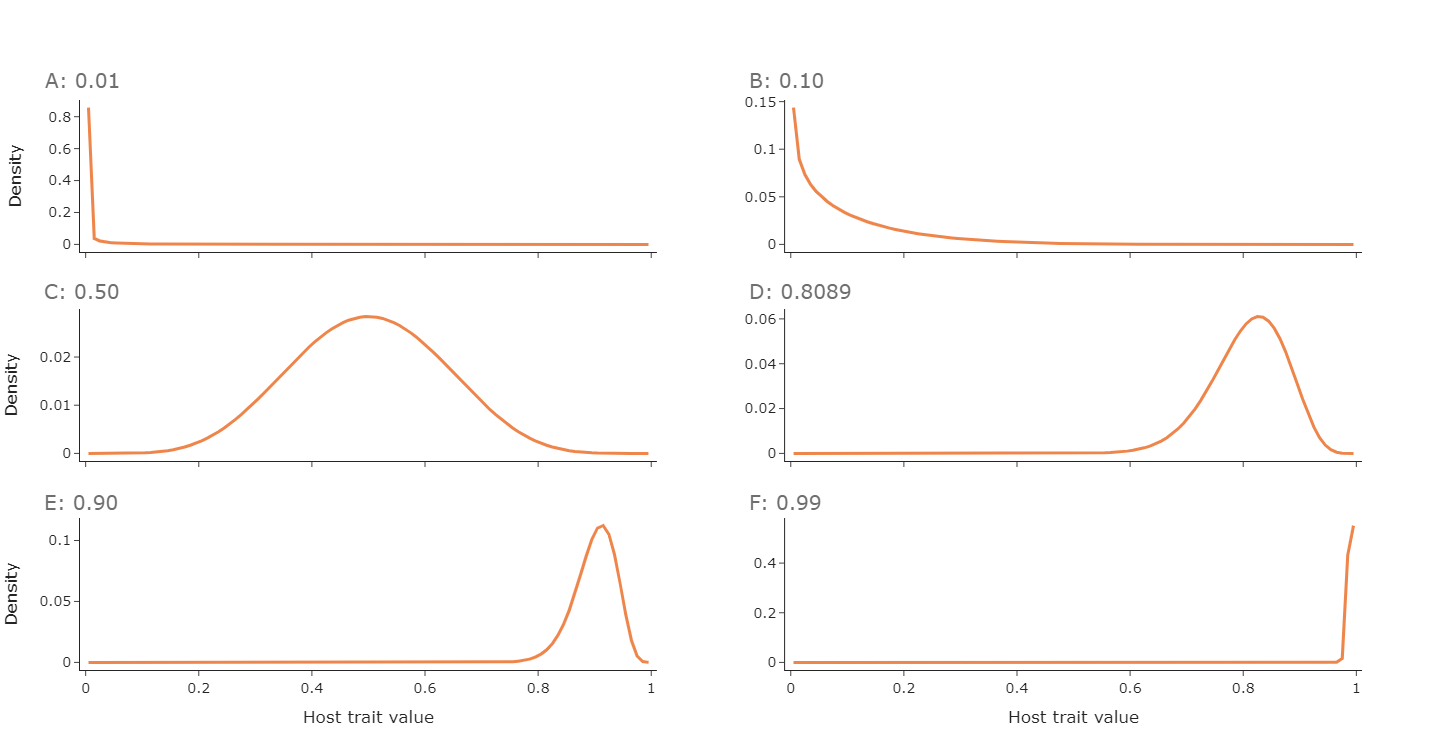

In [66]:
f = app4_fig()

f.show()

In [68]:
f.write_image('../figures/paper_figs/app4_fig.png', scale=4)